<IPython.core.display.Javascript object>


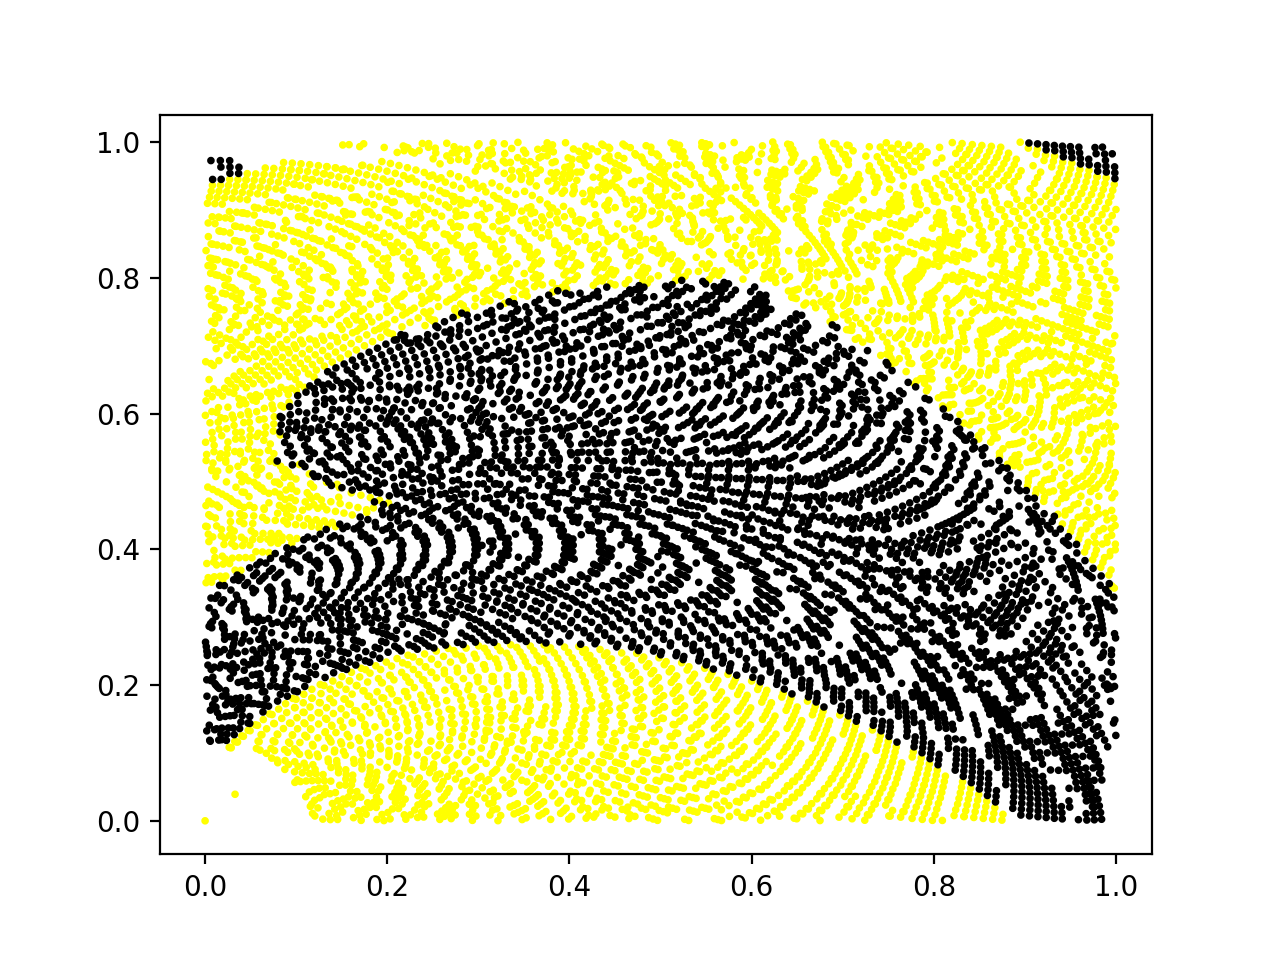

In [15]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

##### Solving the flow #####

def flow(u, x, odestep, h, steps):
	'''
	  u: vector field
	  x: n-by-2 array of initial conditions where n is the grid size
	  odestep: numerical method for solving ode
	  h: step size for numerical method
	  steps: total number of steps to take
	  The algorithm returns Points which is a steps-by-n-by-2 array.
	  Points[i,j,k] is the value of the kth coordinate of the jth point
	  at the ith time step. 
	'''
	Points = np.empty((steps,len(x),2))
	Points[0,:,:] = x
	for i in range(1,steps):
		x = odestep(u,x,h)
		x = x - np.floor(x)
		Points[i,:,:] = x
	return Points


##### ODE solvers #####

# Euler
def euler(u,x,h):
	return x + h * u(x)

# Runge-Kutta 4
def rk4(u,x,h):
	k1 = u(x)
	k2 = u(x + (h/2) * k1)
	k3 = u(x + (h/2) * k2)
	k4 = u(x + h * k3)
	return x + (h/6) * (k1 + 2.*(k2 + k3) + k4)


##### Vector field #####

# At a point
def u_point(x):
	return np.array([x[1], -x[0]])

# Over the whole space
def u(x):
	return np.array([u_point(xi) for xi in x])


##### Initial data #####

def initial(x):
	initial_vals = np.ones(x.shape[0])
	for i in range(x.shape[0]):
		if x[i,0] > 0.5:
			initial_vals[i] = 0.
	return initial_vals

x = np.mgrid[0:1:0.01, 0:1:0.01].reshape(2,-1).T
initial_vals = initial(x)
h = 0.01
steps = 500

points = flow(u, x, euler, h, steps)

### Animation ###
fig, ax = plt.subplots(1, 1)

colors = np.where(initial_vals==1,'yellow','black')
scatter = ax.scatter(points[0, :, 0], points[0, :, 1], s=3, c=colors)

def update(i):
   scatter.set_offsets(points[i, :, 0:2])
   return scatter,

anim = FuncAnimation(fig, update, frames=steps, interval=10, repeat=True)

#anim.save('Simulation3.mp4', fps=30)
plt.show()